<a href="https://colab.research.google.com/github/Ranjita2022/Ranju/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gJ2EgKQLeFLPrDZWMdPs")
project = rf.workspace("ranjita-infb1").project("dental-gjlh1")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dental-1 in yolov11:: 100%|██████████| 5002/5002 [00:01<00:00, 2719.62it/s]


In [ ]:
!nvidia-smi

Thu Dec 19 17:59:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0              30W /  70W |    243MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/Data


## Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gJ2EgKQLeFLPrDZWMdPs")
project = rf.workspace("ranjita-infb1").project("dental-gjlh1")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dental-1 in yolov11:: 100%|██████████| 5002/5002 [00:00<00:00, 5209.18it/s]


## Custom Training

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolo11s.pt data=/content/datasets/Dental-1/data.yaml epochs=10 imgsz=640 plots=True


/content
100% 18.4M/18.4M [00:00<00:00, 138MB/s] 
New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Dental-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=No

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1734635485.23ea9f90d9dd.7074.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


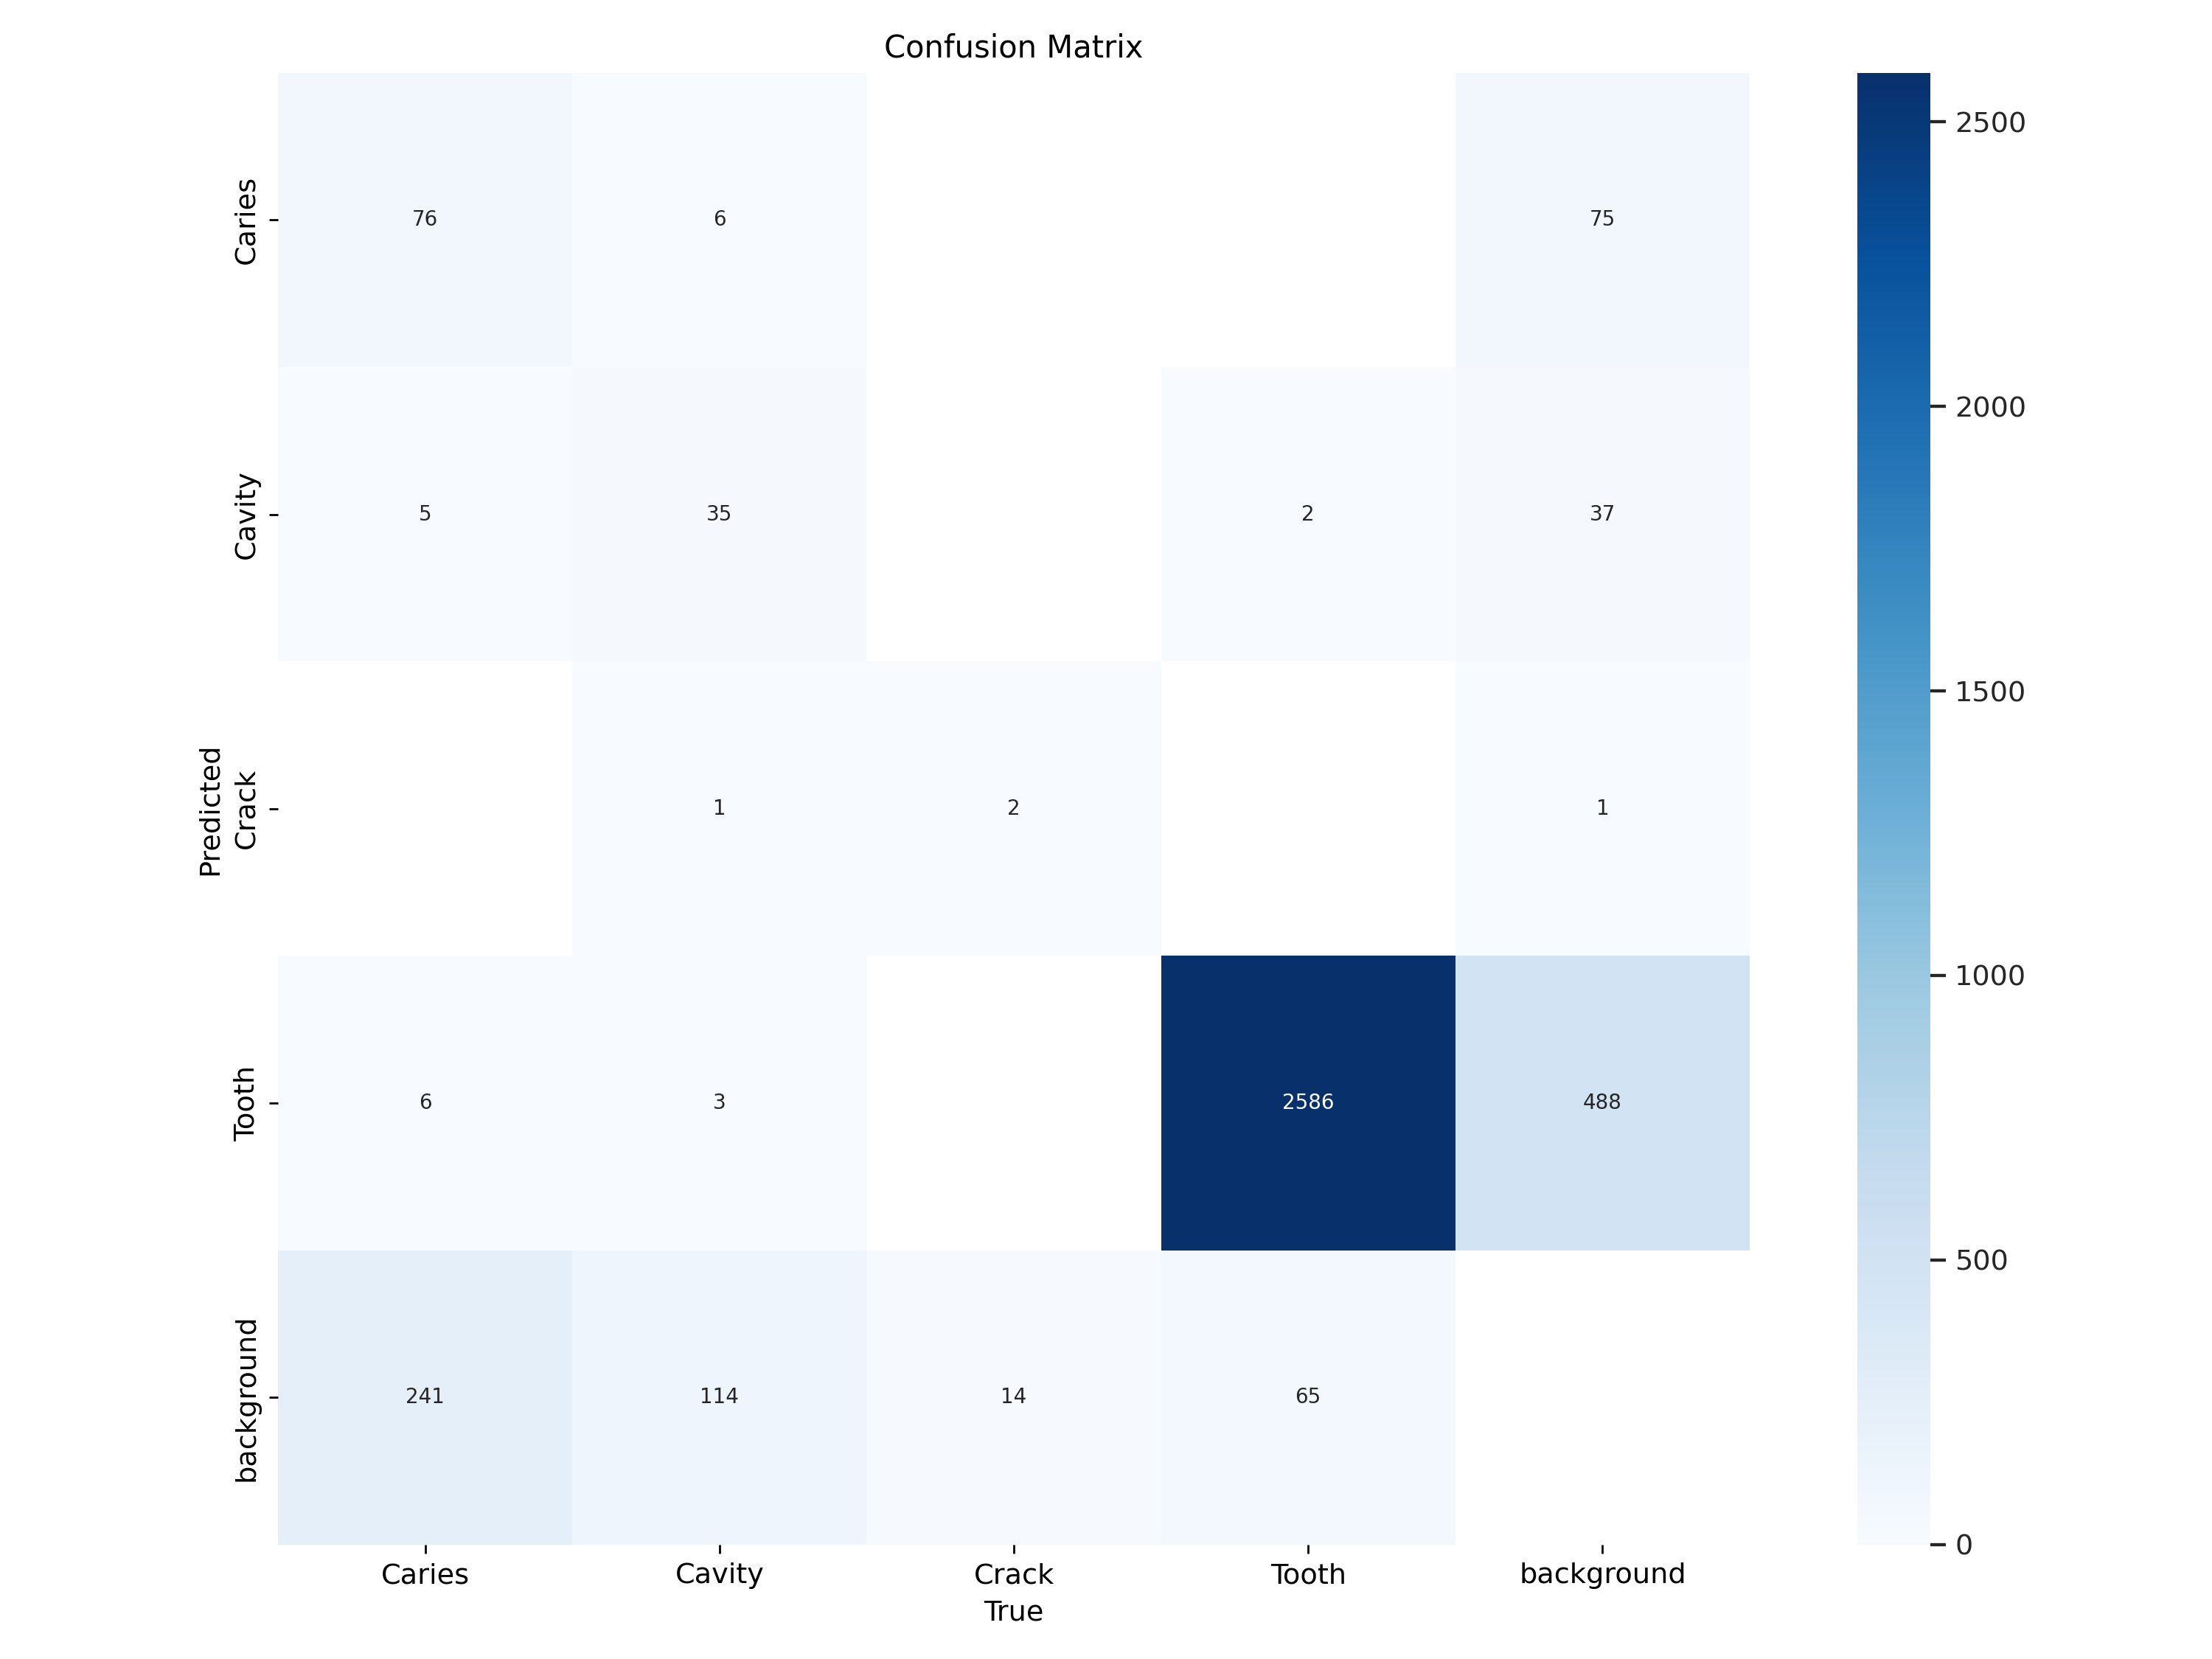

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

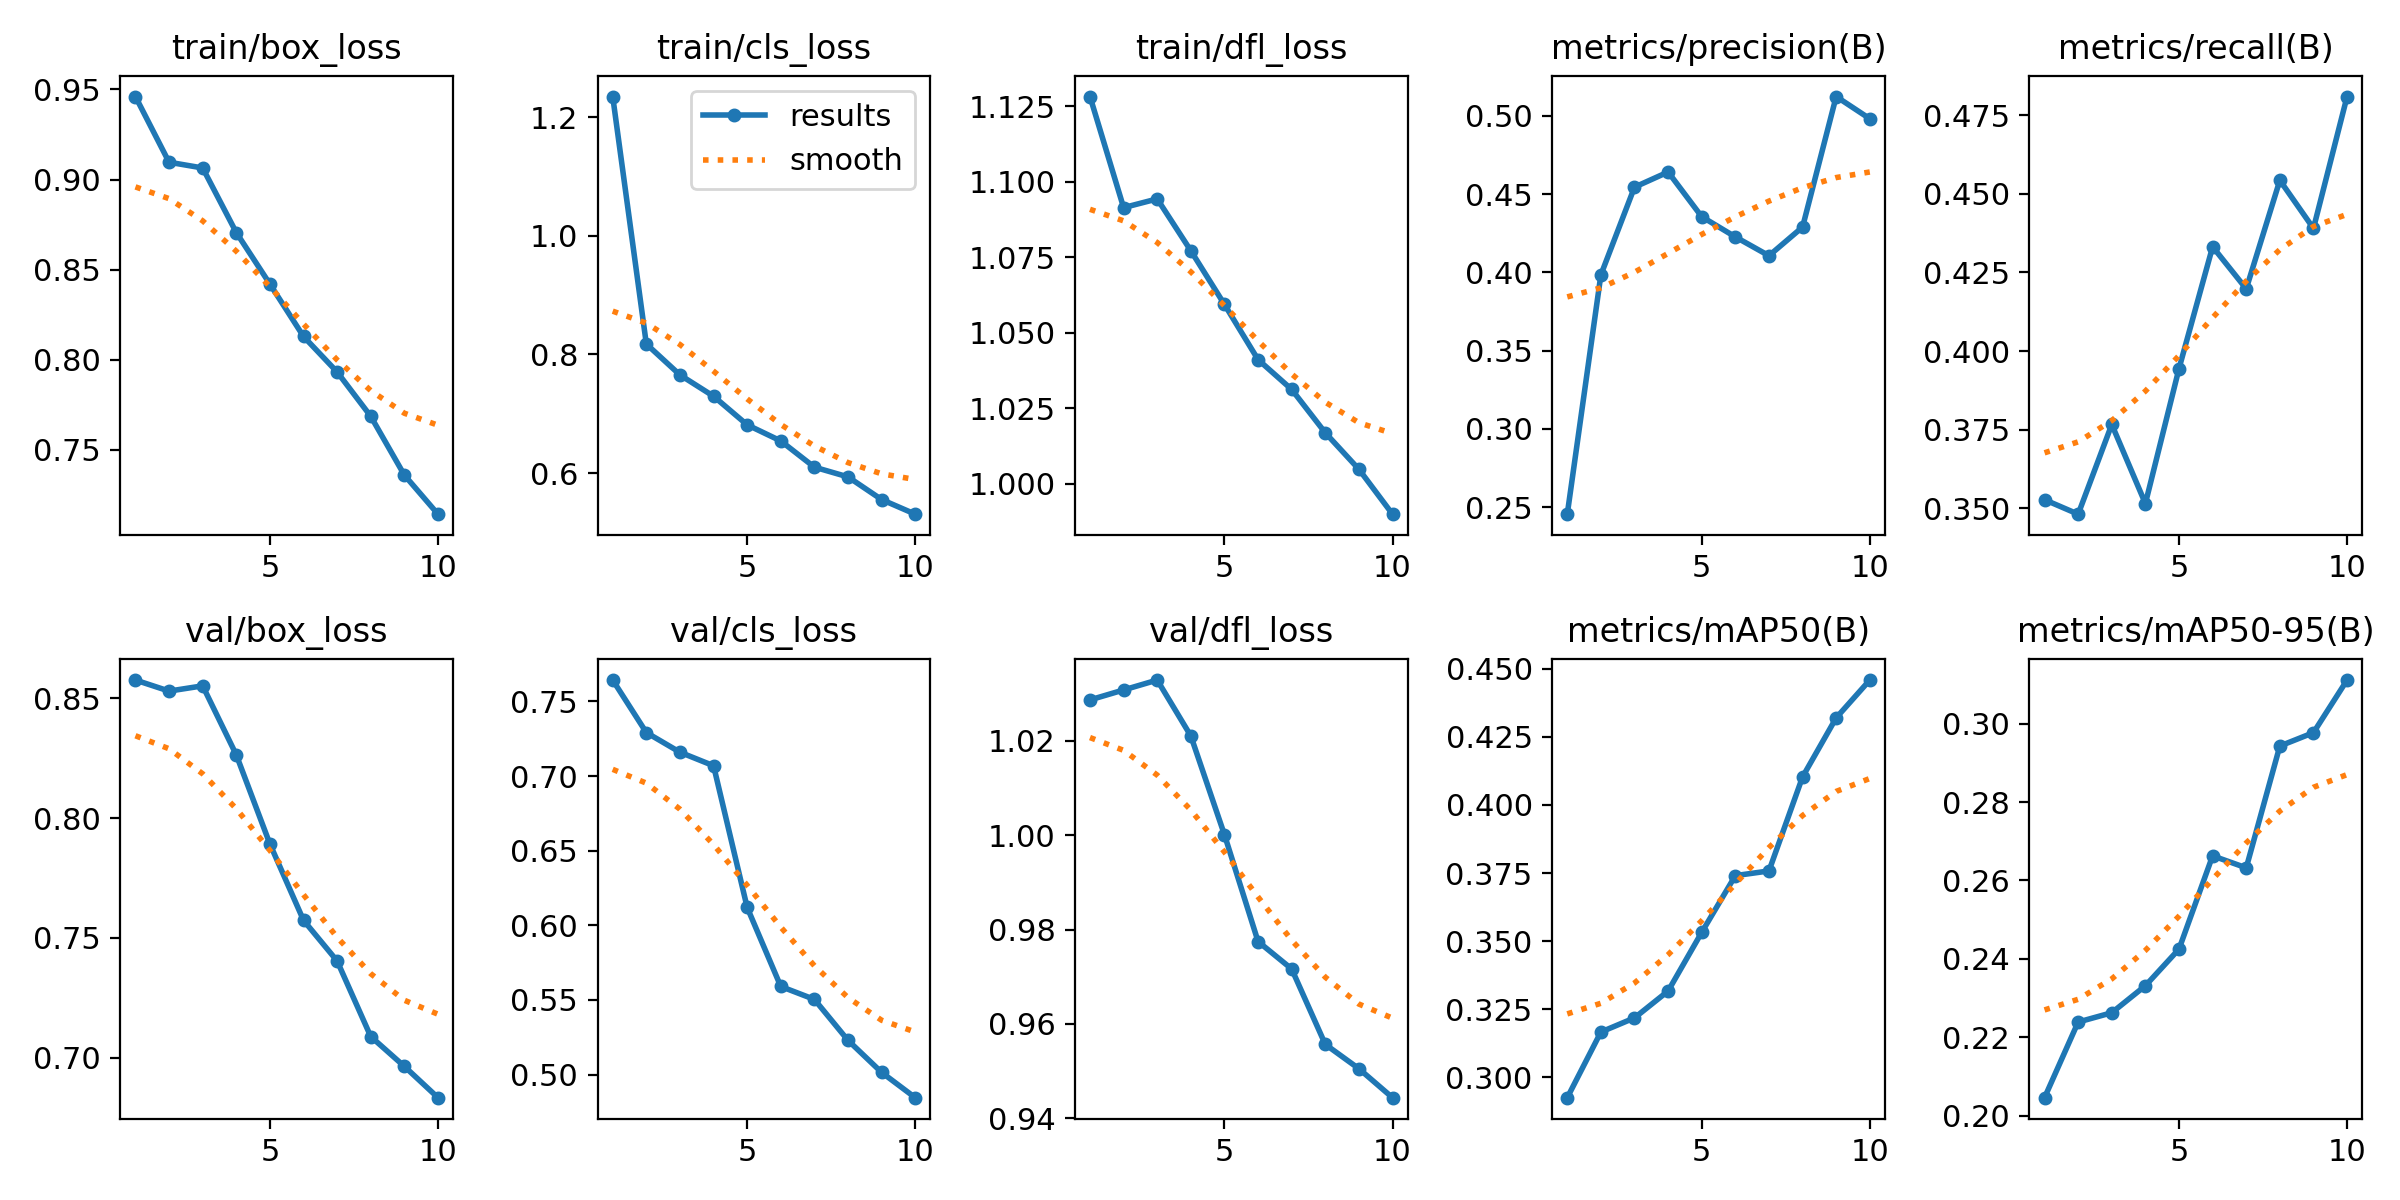

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

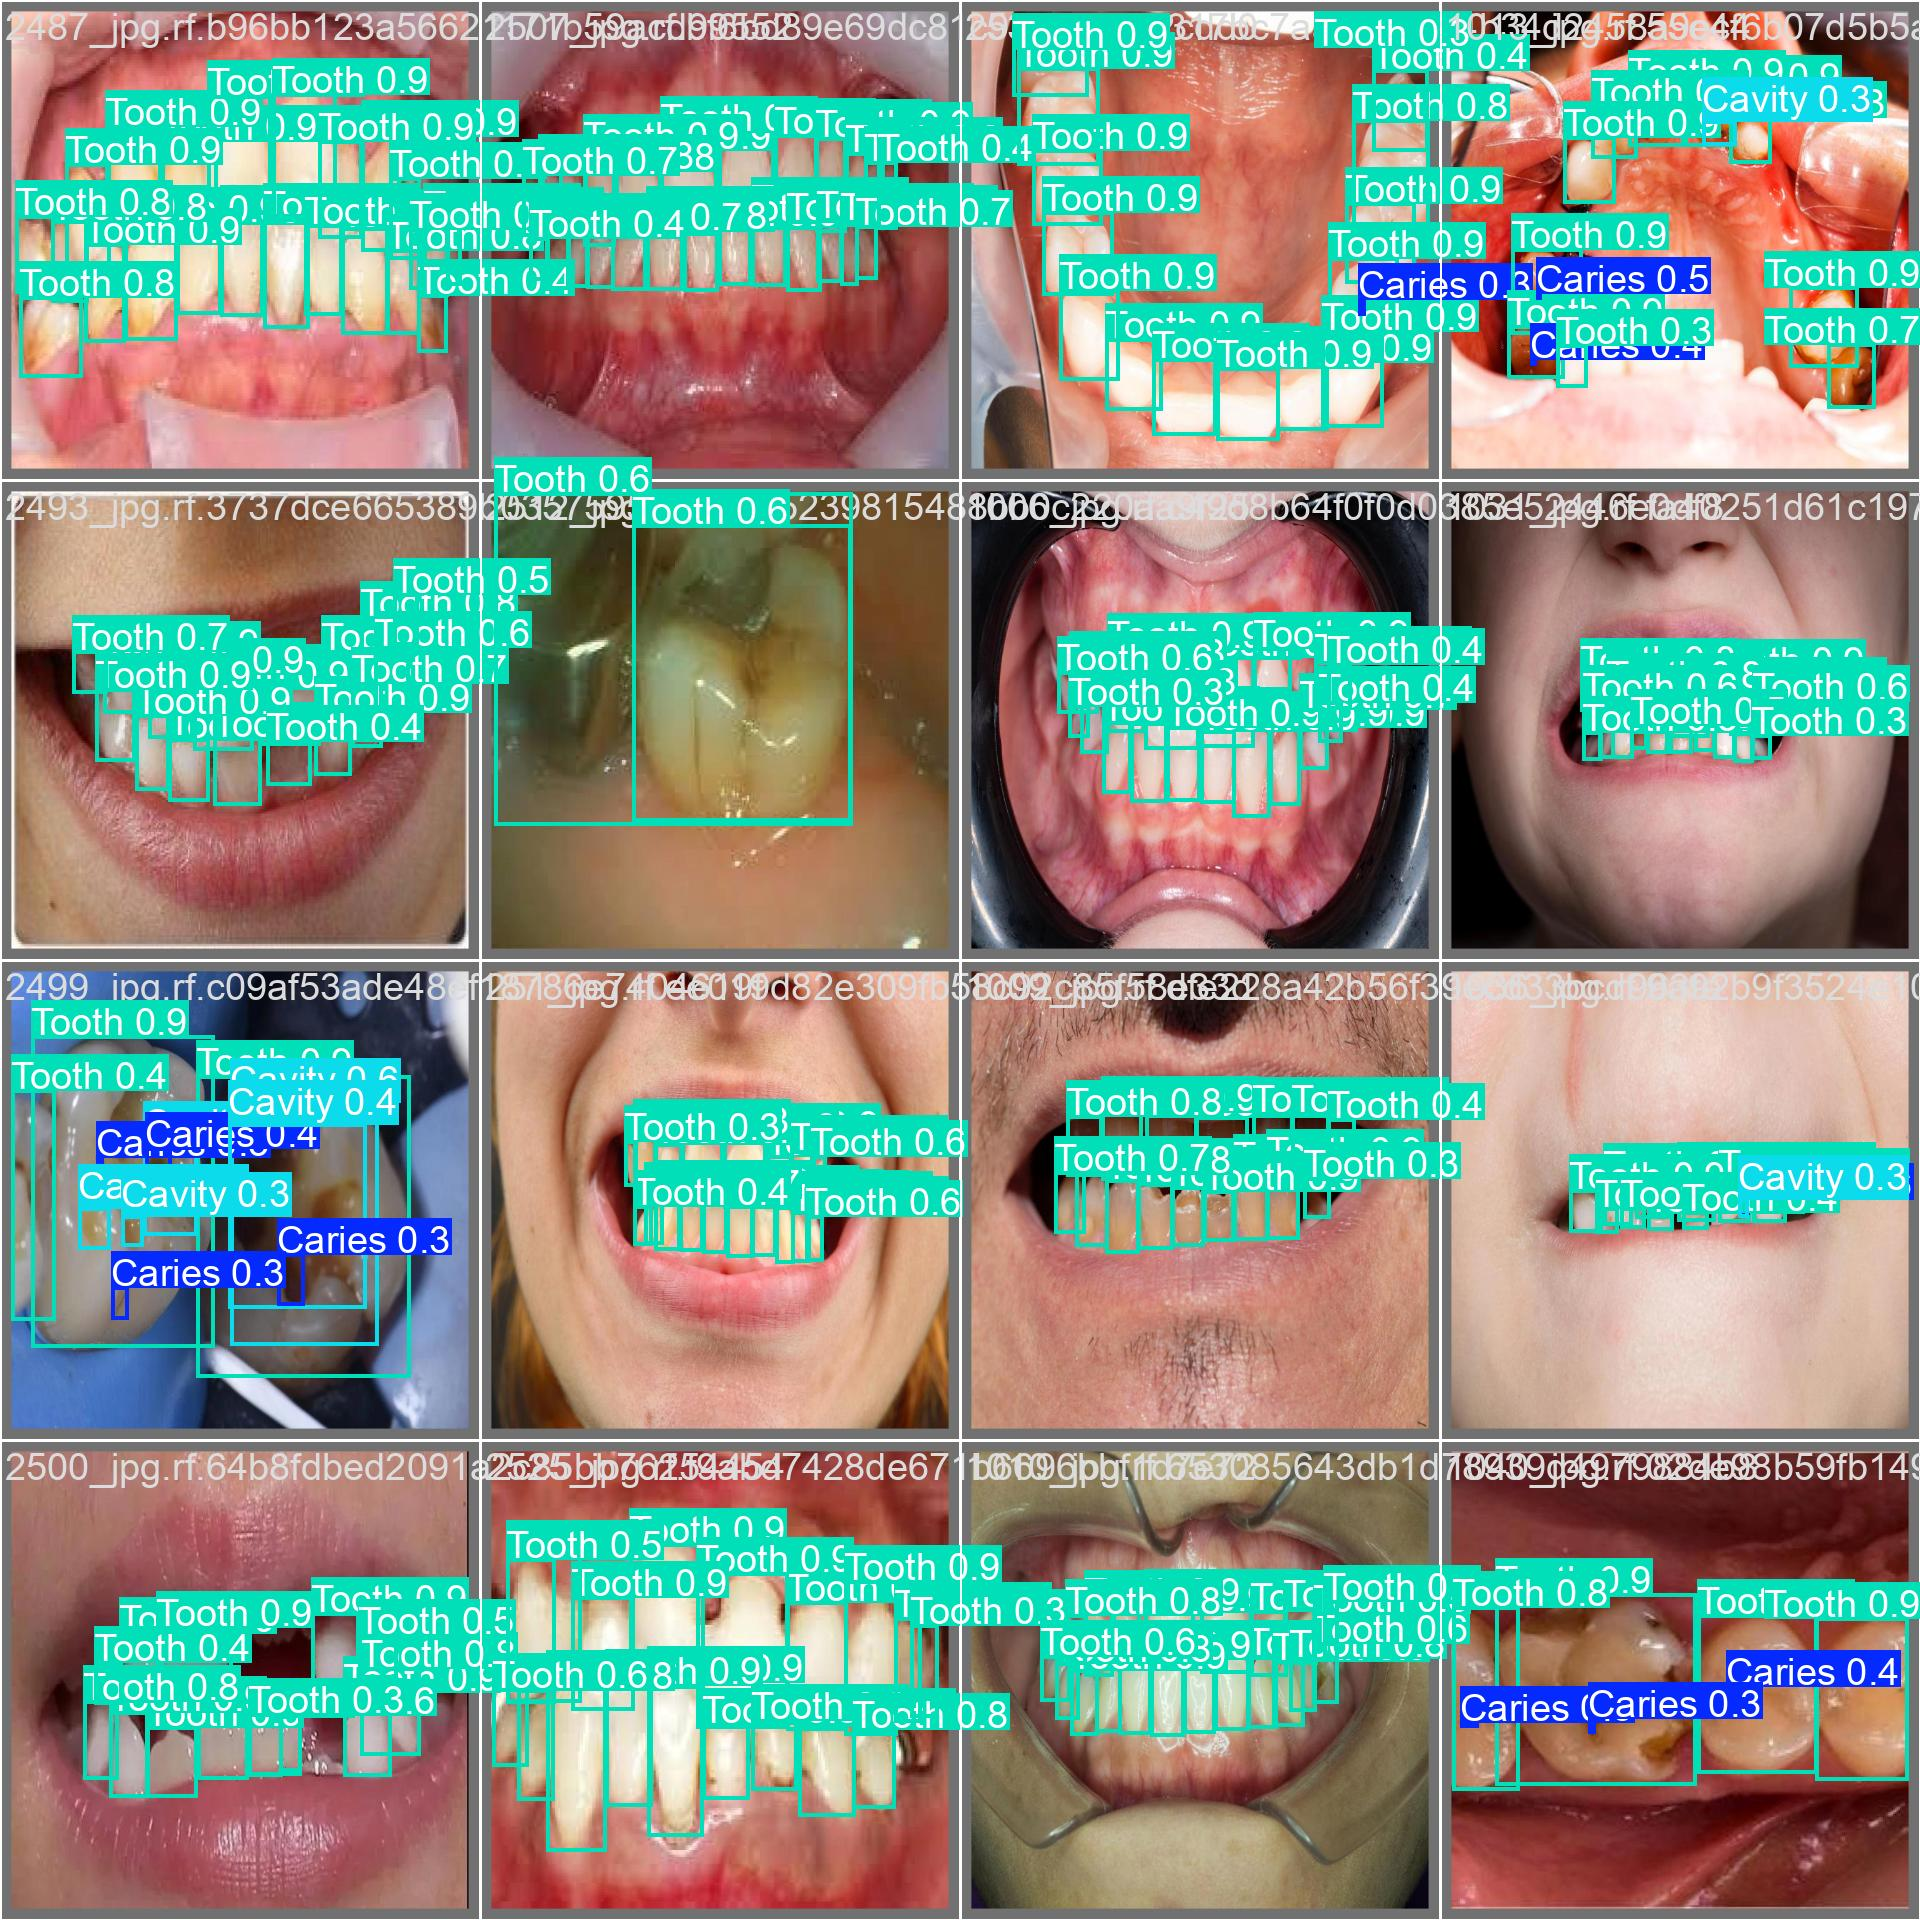

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/Dental-1/data.yaml


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Dental-1/valid/labels.cache... 254 images, 0 backgrounds, 0 corrupt: 100% 254/254 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:06<00:00,  2.54it/s]
                   all        254       3156      0.499      0.482      0.446      0.312
                Caries        102        328      0.385      0.354      0.288      0.132
                Cavity         85        159      0.355       0.34      0.286      0.132
                 Crack         12         16      0.459       0.25      0.237      0.146
                 Tooth        254       2653      0.797      0.983      0.971      0.837
Speed: 0.8ms preprocess, 9.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at h

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Dental-1/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/250 /content/datasets/Dental-1/test/images/1012_jpg.rf.bef19a24036edf51990be0853f3c2fc8.jpg: 640x640 21 Cariess, 3 Tooths, 15.6ms
image 2/250 /content/datasets/Dental-1/test/images/103_jpg.rf.8822ddbf5e9b4fbe2887bb10e3075990.jpg: 640x640 17 Tooths, 15.6ms
image 3/250 /content/datasets/Dental-1/test/images/1047_jpg.rf.c600b6d22a45fa0fd2492c5d2e7c6bbb.jpg: 640x640 1 Cavity, 1 Tooth, 15.5ms
image 4/250 /content/datasets/Dental-1/test/images/1048_jpg.rf.f2f6e7d0c4fa67b40781948afc060e6d.jpg: 640x640 1 Caries, 7 Tooths, 15.5ms
image 5/250 /content/datasets/Dental-1/test/images/1052_jpg.rf.bad0fcaf9b422757b2022786de1933e2.jpg: 640x640 1 Caries, 5 Tooths, 15.5ms
image 6/250 /content/datasets/Dental-1/test/images/1070_jpg.rf.76e18a6b02ea3788f258dd5e808ebdb3.jpg: 640x640 1 Caries, 8 Tooths, 15.5ms
image 7/250 /content/datas

**NOTE:** Let's take a look at few results.

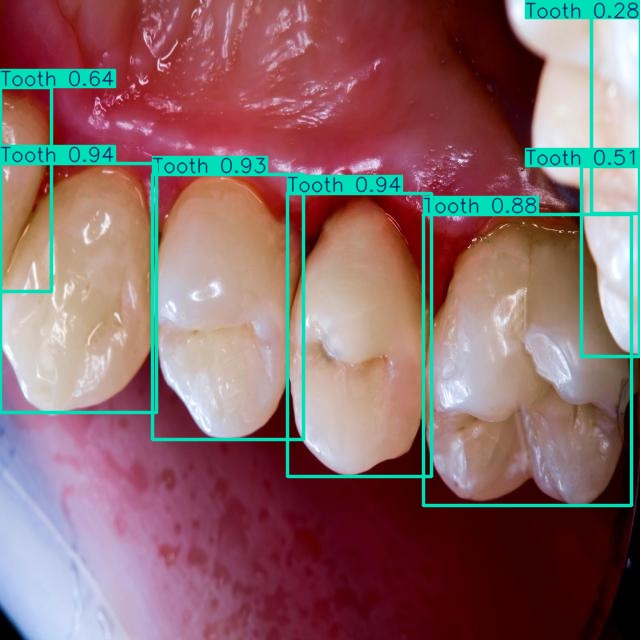

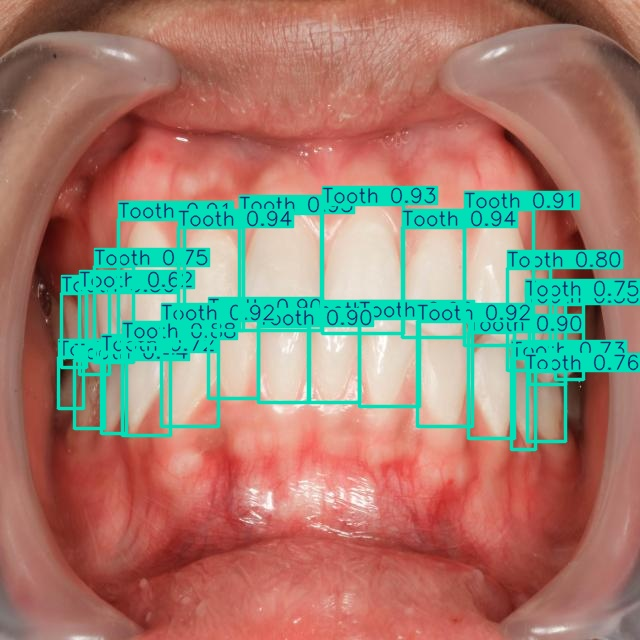

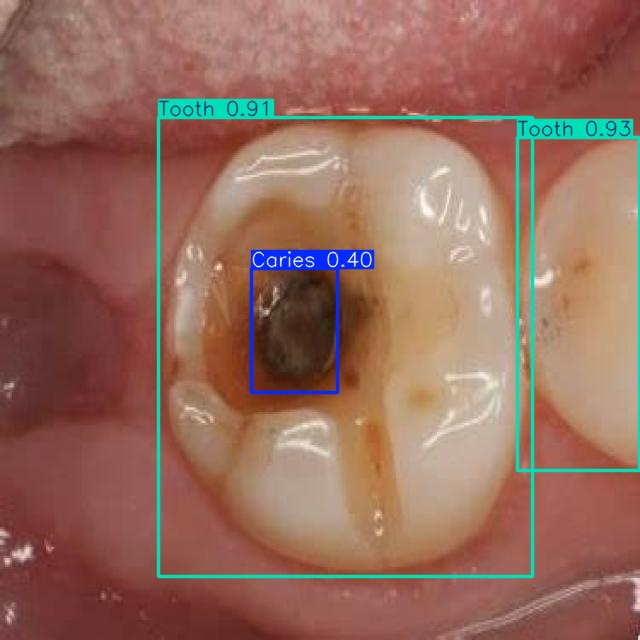

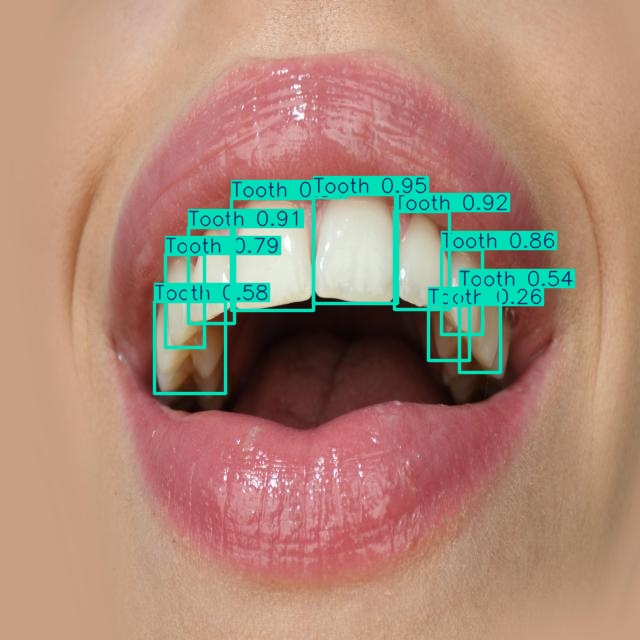

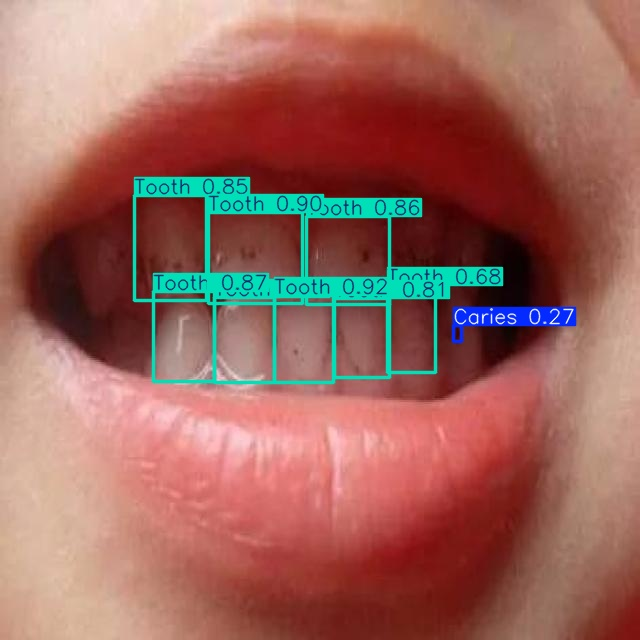

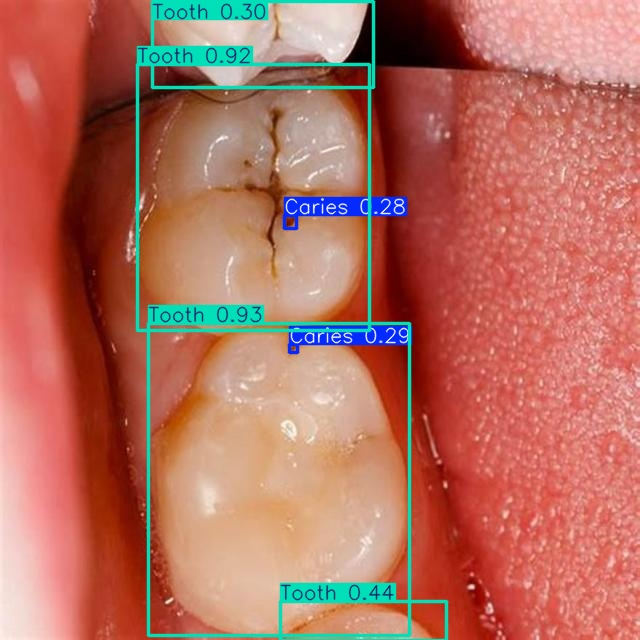

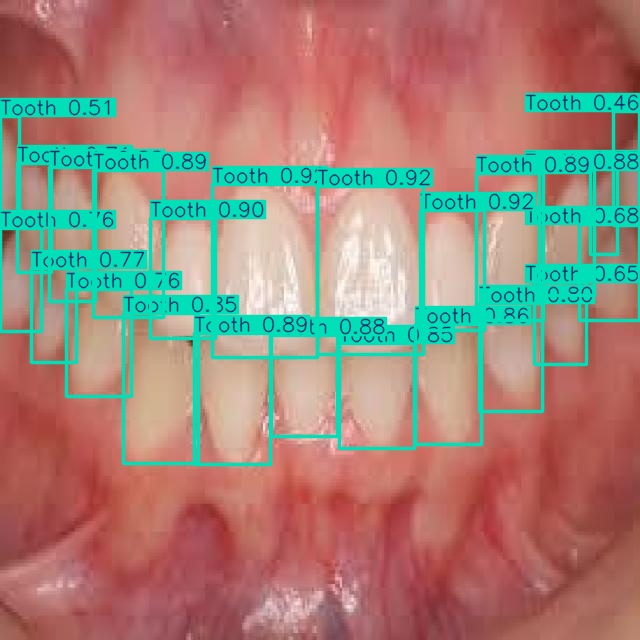

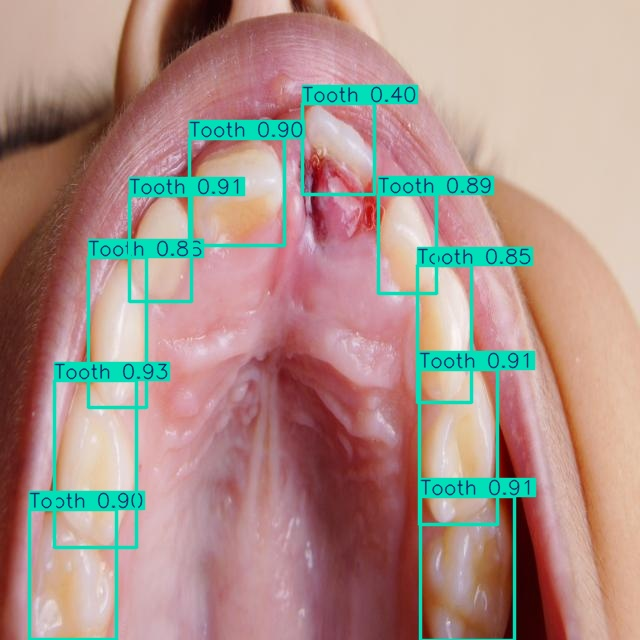

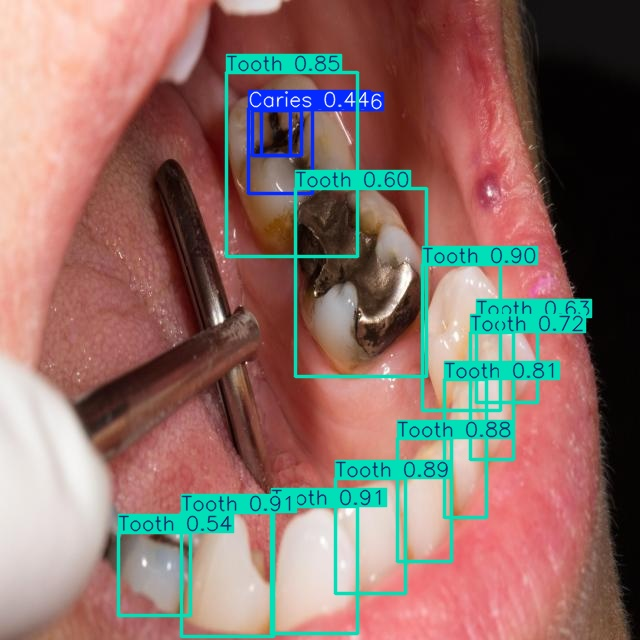

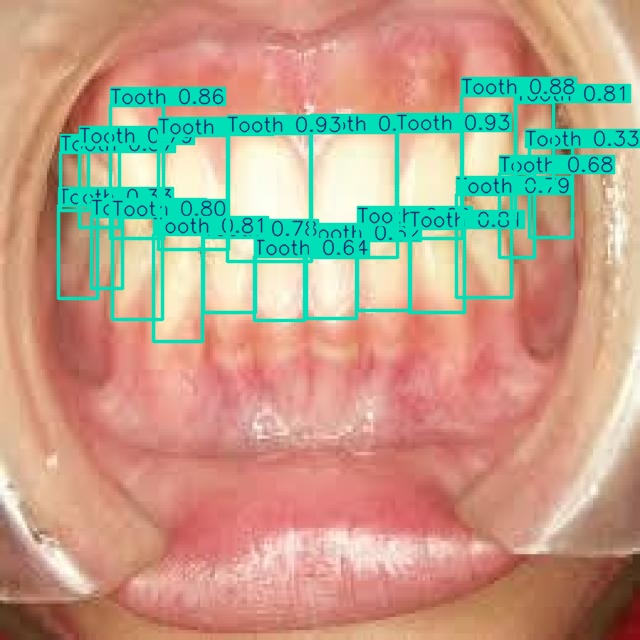

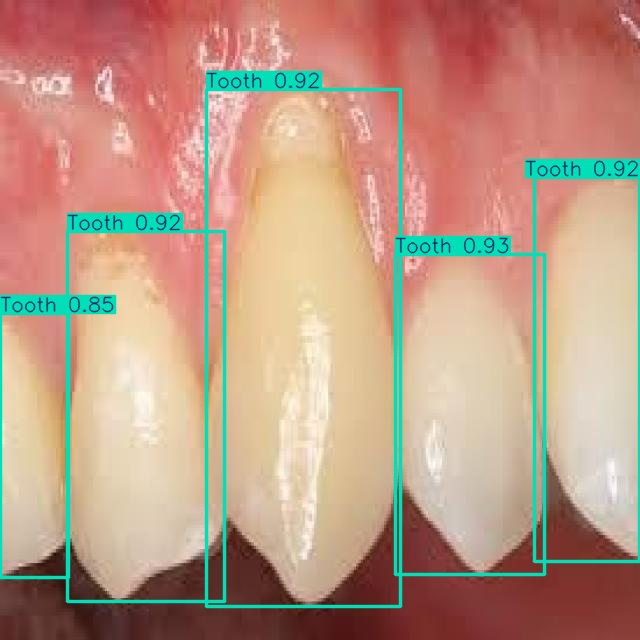

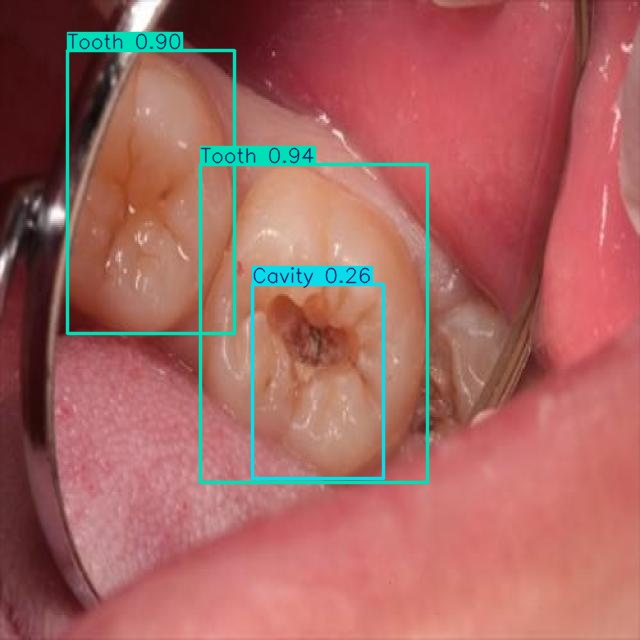

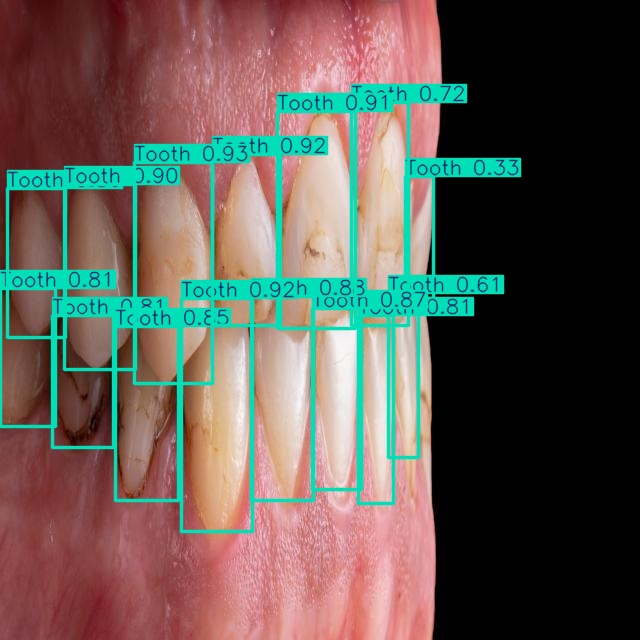

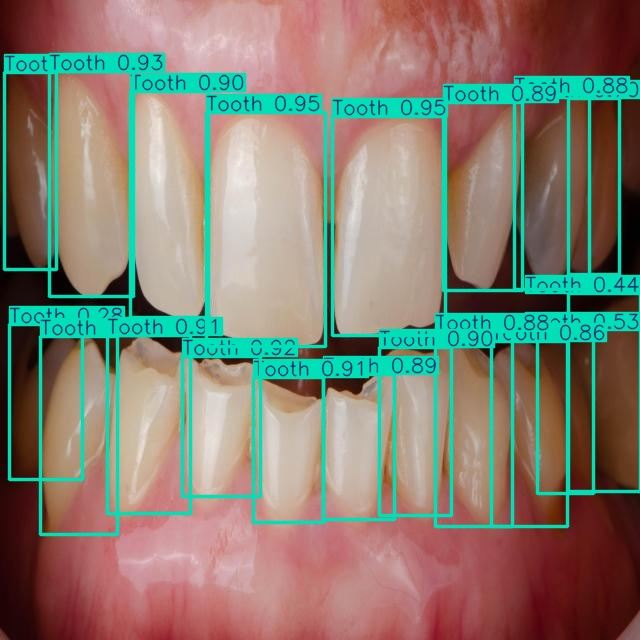

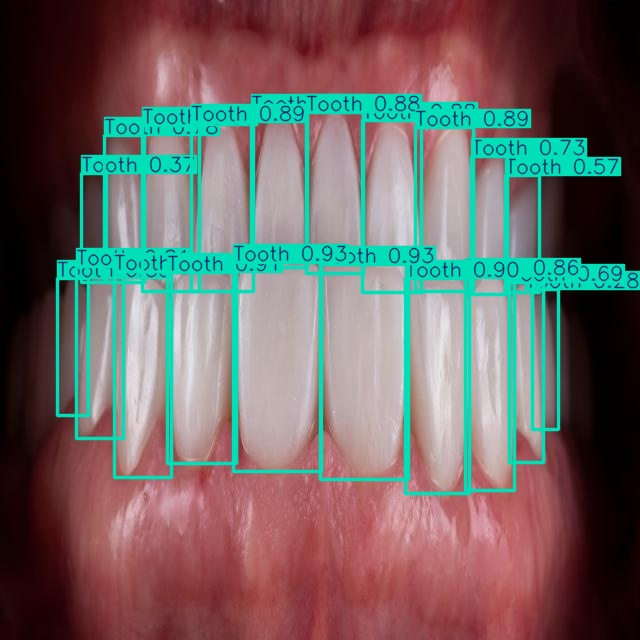

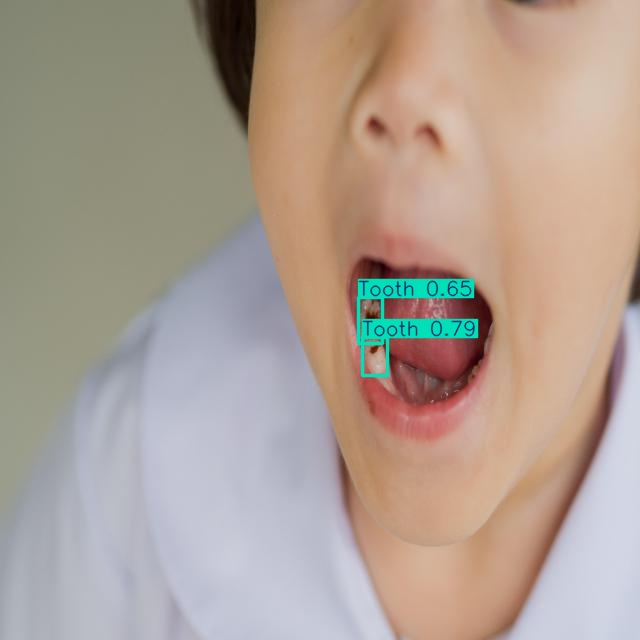

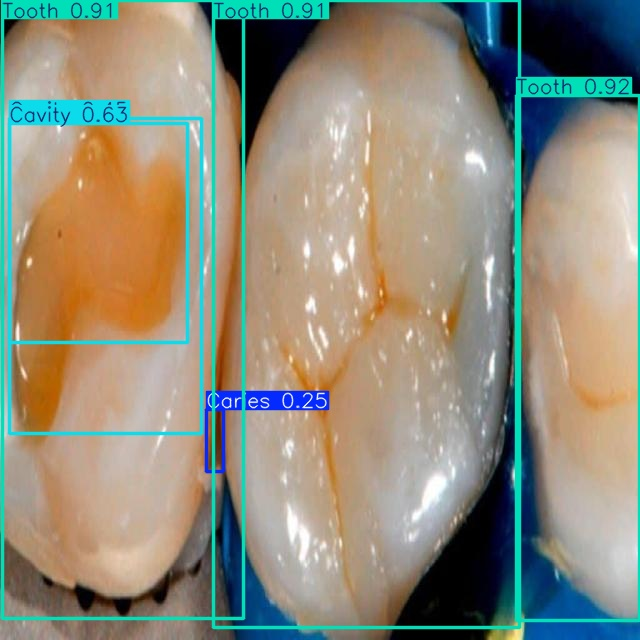

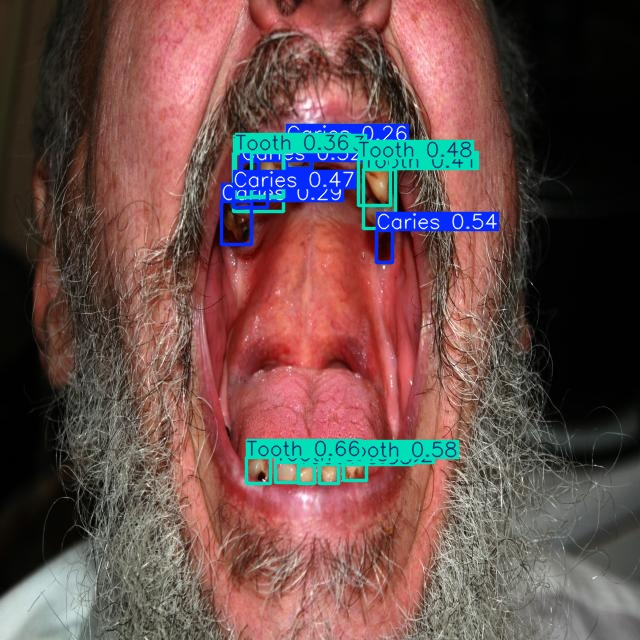

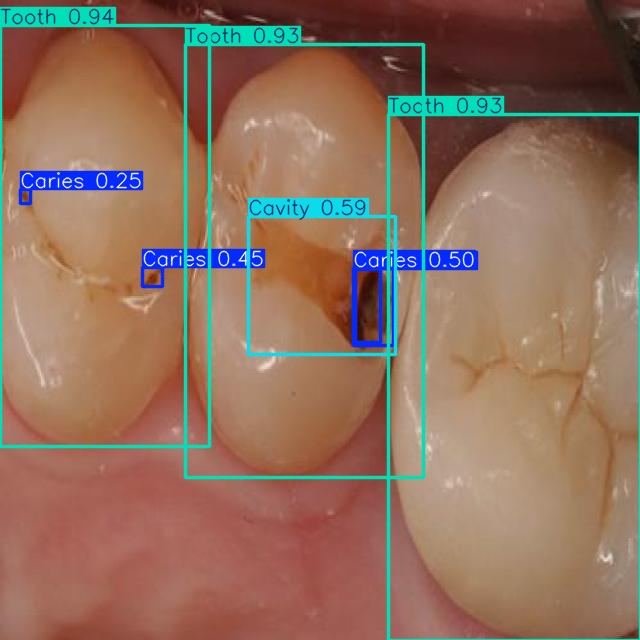

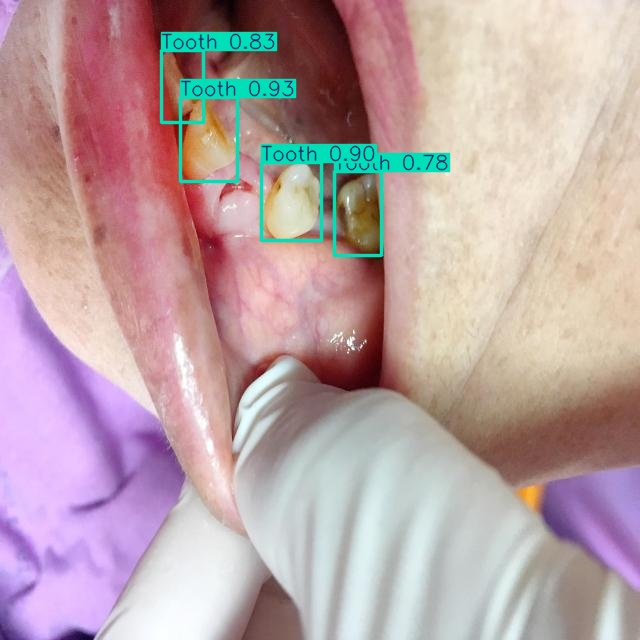

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:20]:
    display(IPyImage(filename=img, width=600))
    print("\n")